# Mining The Bar Graph Data

In [1]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

In [2]:
stats2015 = pd.read_csv("the-counted-revised-2015.csv")
stats2016 = pd.read_csv("the-counted-revised-2016.csv")

### Missing Data

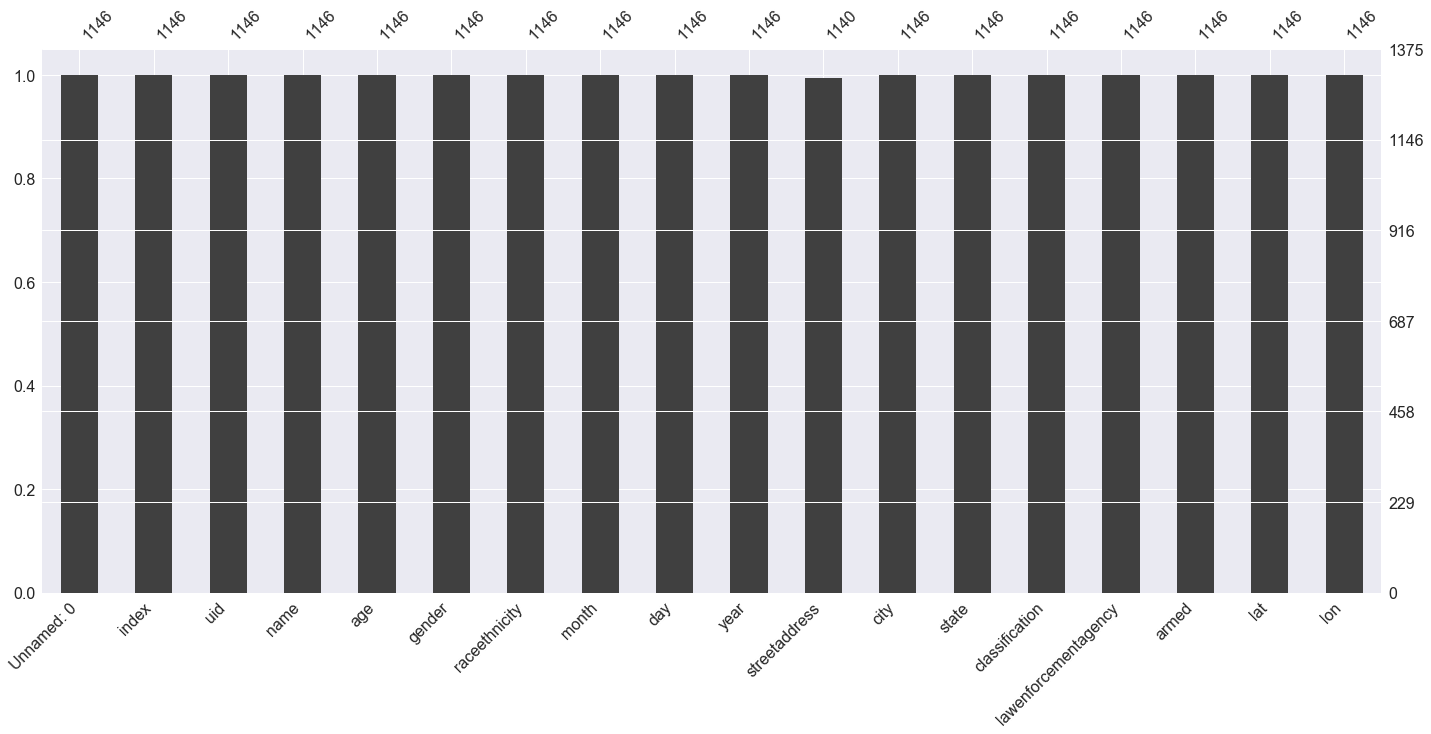

In [3]:
msno.bar(stats2015)

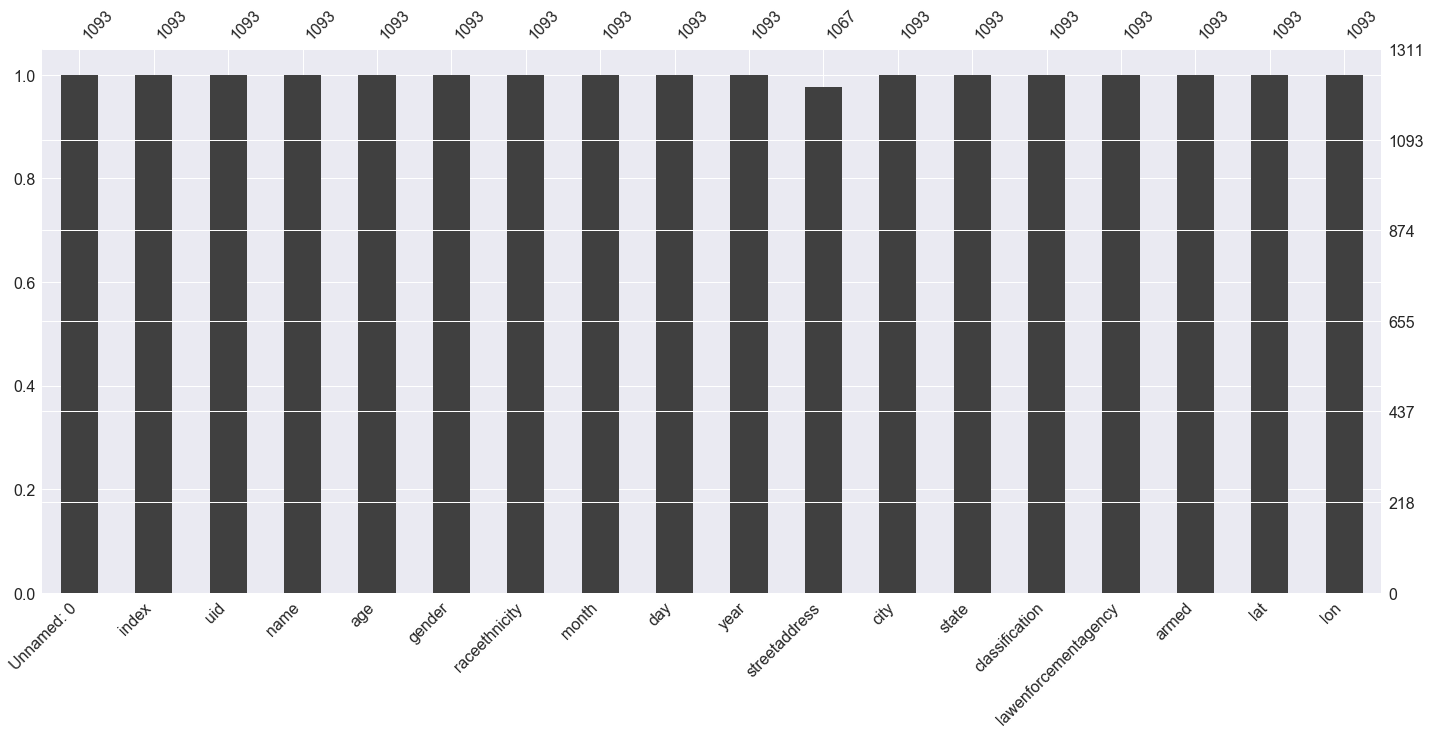

In [4]:
msno.bar(stats2016)

'streetaddress' seems to be the only column that is missing data. That is good news as we can count any of the other columns

In [5]:
stats2015.head()

,Unnamed: 0,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
0,0,0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No,32.083541,-81.099834
1,1,1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm,45.494284,-122.867045
2,2,2,5,Michael Kocher Jr,19,Male,White,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No,21.918204,-159.618301
3,3,3,6,John Quintero,23,Male,Hispanic/Latino,January,3,2015,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No,37.692236,-97.337545
4,4,4,7,Tim Elliott,53,Male,Asian/Pacific Islander,January,2,2015,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm,47.215094,-123.100707


In [6]:
stats2016.head()

,Unnamed: 0,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
0,0,0,2016406,Terry Frost,20,Male,Black,May,25,2016,2692 Madison Rd,Cincinnati,OH,Gunshot,Cincinnati Police Department,Firearm,39.101454,-84.512460
1,1,1,201681,Jeffry Graves,62,Male,White,January,31,2016,36500 Bridgepointe Dr,Newark,CA,Gunshot,Newark Police Department,Firearm,37.529659,-122.040240
2,2,2,20161,Joshua Sisson,30,Male,White,January,1,2016,4200 6th Ave,San Diego,CA,Gunshot,San Diego Police Department,Knife,32.717421,-117.162771
3,3,3,20163,Sean O'Brien,37,Male,White,January,2,2016,100 Washington St,Livingston,MT,Gunshot,Livingston Police Department,Knife,45.662436,-110.561040
4,4,4,201653,Lance Light,54,Male,White,January,2,2016,I-20 and Texas Hwy 70,Sweetwater,TX,Gunshot,Sweetwater Police Department,Firearm,32.470952,-100.405938


In [7]:
#Dropping the extra axis
stats2015 = stats2015.drop(['Unnamed: 0'],axis=1)
stats2016 = stats2016.drop(['Unnamed: 0'],axis=1)

In [8]:
# Using the count methods to obtain the frequency of data
armed2015 = stats2015.groupby('armed')['index'].count()
armed2016 = stats2016.groupby('armed')['index'].count()

In [9]:
print('2015',armed2015,'\n')
print('2016',armed2016)

2015 armed
Disputed                5
Firearm               554
Knife                 152
No                    235
Non-lethal firearm     47
Other                  64
Unknown                45
Vehicle                44
Name: index, dtype: int64 

2016 armed
Disputed               11
Firearm               506
Knife                 159
No                    170
Non-lethal firearm     46
Other                  84
Unknown                82
Vehicle                35
Name: index, dtype: int64


In [10]:
race2015 = stats2015.groupby('raceethnicity')['index'].count()
race2016 = stats2016.groupby('raceethnicity')['index'].count()

In [11]:
print('2015',race2015,'\n')
print('2016',race2016)

2015 raceethnicity
Arab-American               4
Asian/Pacific Islander     24
Black                     307
Hispanic/Latino           195
Native American            13
Other                       1
Unknown                    18
White                     584
Name: index, dtype: int64 

2016 raceethnicity
Arab-American               3
Asian/Pacific Islander     21
Black                     266
Hispanic/Latino           183
Native American            24
Unknown                    22
White                     574
Name: index, dtype: int64


In [12]:
how2015 = stats2015.groupby('classification')['index'].count()
how2016 = stats2016.groupby('classification')['index'].count()

In [13]:
print('2015',how2015,'\n')
print('2016',how2016)

2015 classification
Death in custody       47
Gunshot              1017
Other                   1
Struck by vehicle      31
Taser                  50
Name: index, dtype: int64 

2016 classification
Death in custody       37
Gunshot              1011
Other                   2
Struck by vehicle      21
Taser                  22
Name: index, dtype: int64


I noticed that there was only one "other" column for raceethnicity so I decided to explore.

In [14]:
stats2015[stats2015['raceethnicity'] == 'Other']

,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
782,782,804,Mohamed Ibrahim,28,Male,Other,September,6,2015,2800 Holly St,Shreveport,LA,Gunshot,Shreveport Police Department,Firearm,32.522183,-93.765194


Looking through the database's sources, there seems to be no evidence that Mohamed Ibrahim is qualified for the race
section of 'Other'. Therefore, I plan to change this statistic to 'Unknown'.


In [15]:
stats2015.ix[782,'raceethnicity'] = 'Unknown'

In [16]:
armed2015.to_json('armed2015.json')
race2015.to_json('race2015.json')
how2015.to_json('how2015.json')
armed2016.to_json('armed2016.json')
race2016.to_json('race2016.json')
how2016.to_json('how2016.json')